In [ ]:
#required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading Datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [ ]:
#display shape
print("shape of training dataset",train.shape)
print("shape of testing dataset",test.shape)

shape of testing dataset (418, 11)


In [ ]:
#checking for null values
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
#Description of dataset
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#checking for mean of survived passengers
train.groupby('Survived').mean(numeric_only = True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
# Selecting only numerical features for correlation analysis
numerical_features = train.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


No of Males in Titanic: 577
No of Females in Titanic: 314


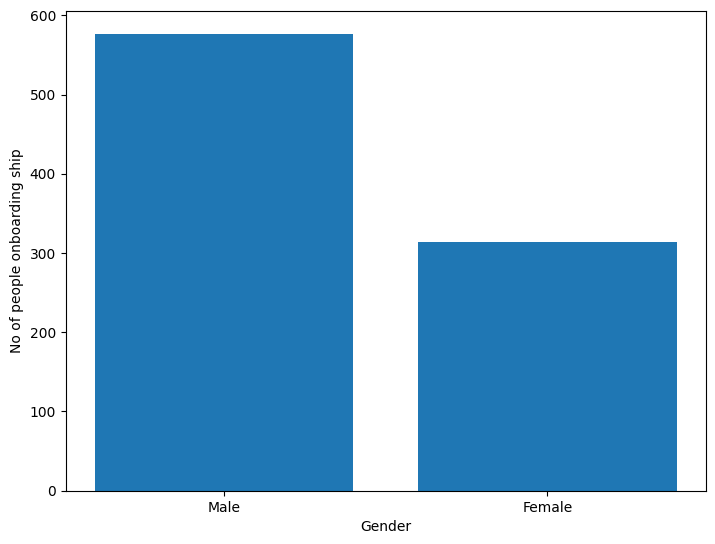

In [ ]:
#number of people from each gender
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

Alive: 342
Dead: 549


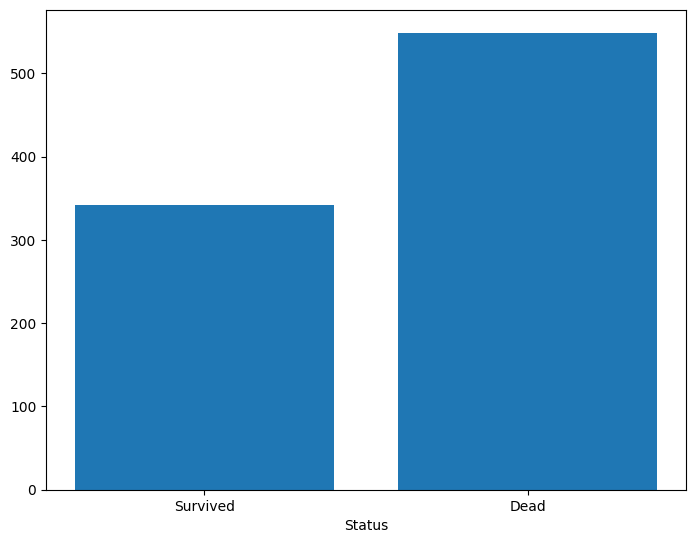

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])
print("Alive:",alive)
print("Dead:",dead)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

#survival probability by gender
train.groupby('Sex')[['Survived']].mean()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

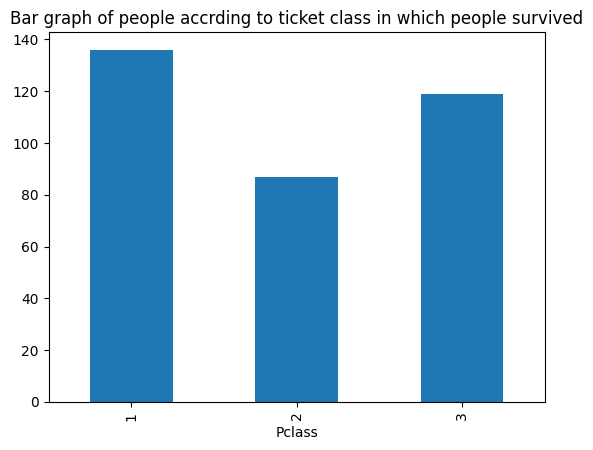

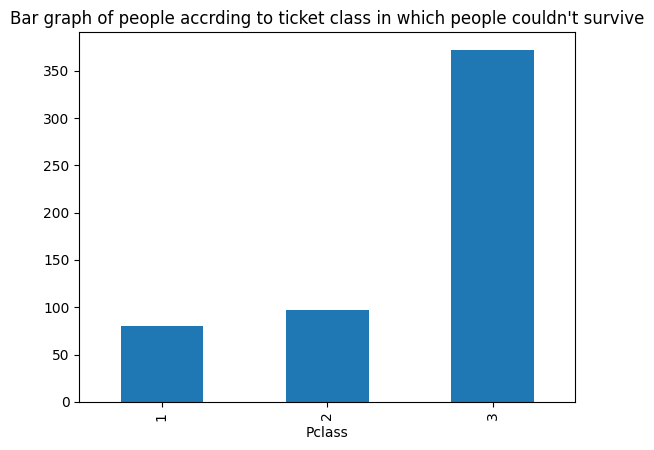

In [ ]:
#survival chances by ticket class

plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x7a722a453eb0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

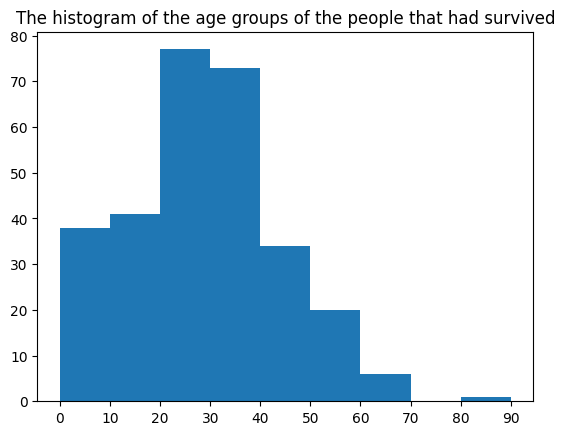

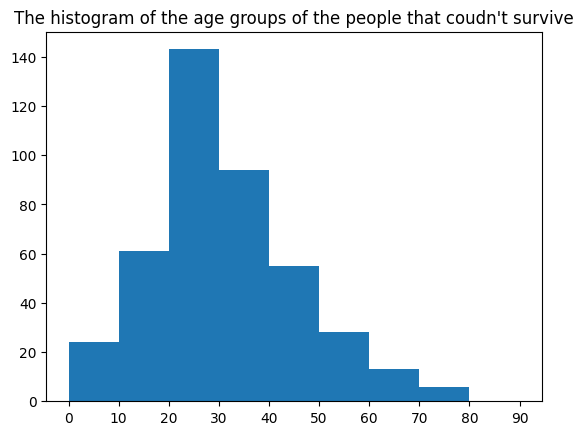

In [ ]:
#survival chances by age group

plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [ ]:
# probability of survivals

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)


,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


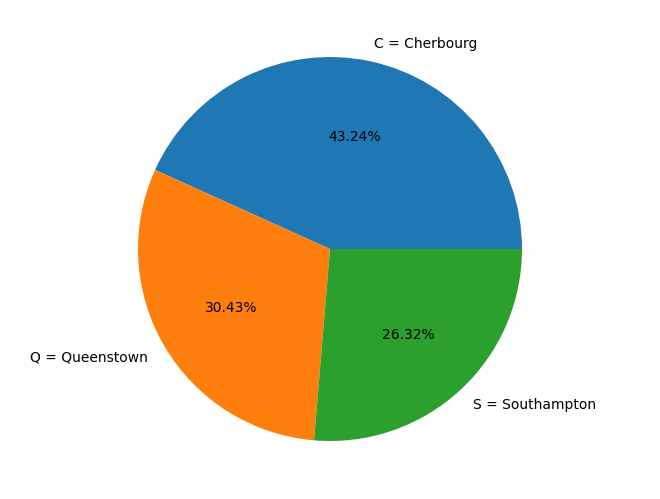

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [ ]:
#Droping Useless Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [ ]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [ ]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [ ]:
#now we have to fill all the missing values age have 177  missing values either we fill missing values with mean or median form existing values
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

<ipython-input-23-b534b7bde6e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=X['Age'].fillna(X['Age'].median())


0

In [ ]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

<ipython-input-24-fca0cfe1cf60>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['Embarked'] = train['Embarked'].fillna(method ='pad')
<ipython-input-24-fca0cfe1cf60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = train['Embarked'].fillna(method ='pad')


0

In [ ]:
#now we need to convert sex into integer value
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

<ipython-input-25-dffe84b1471c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=X['Sex'].apply(lambda x:d[x])


,Sex
0,0
1,1
2,1
3,1
4,0


In [ ]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

<ipython-input-26-98af20c93697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked']=X['Embarked'].apply(lambda x:e[x])


,Embarked
0,2
1,0
2,2
3,2
4,2


In [ ]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [ ]:

#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358
[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [ ]:
# Using Random Forest


from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(n_estimators=100, random_state=7)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, y_pred5))

confusion_mat = confusion_matrix(Y_test, y_pred5)
print(confusion_mat)
print(classification_report(Y_test, y_pred5))

Accuracy Score: 0.7798507462686567
[[133  23]
 [ 36  76]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       156
           1       0.77      0.68      0.72       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
results = pd.DataFrame({
    'Model': ['Random Foest' ,'Decision Tree'],
    'Score': [0.779,0.742]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.779,Random Foest
0.742,Decision Tree


In [ ]:
# Ablation Study for Random Forest


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier



# Function to perform ablation study by removing features one by one
def ablation_study(X_train, Y_train, X_test, Y_test, features):
  results = []
  for i in range(len(features)):
    temp_features = features[:i] + features[i+1:]  # Remove one feature
    X_train_temp = X_train[temp_features]
    X_test_temp = X_test[temp_features]

    model = RandomForestClassifier(n_estimators=100, random_state=7)
    model.fit(X_train_temp, Y_train)
    y_pred = model.predict(X_test_temp)

    accuracy = accuracy_score(Y_test, y_pred)
    results.append((features[i], accuracy))

  return results

# Perform ablation study
features = ['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
ablation_results = ablation_study(X_train, Y_train, X_test, Y_test, features)

# Print results


ablation_results_dt_dict = dict(ablation_results)
important_features = sorted(ablation_results_dt_dict.items(), key=lambda x: x[1], reverse=True)
print("\nFeature Importance (Based on Ablation Study):")
for feature, impact in important_features:
   print(f"{feature}: Impact on Accuracy = {impact:.4f}")




#Result : Age and sibsp have most impact when removed 0.7798507462686567


Feature Importance (Based on Ablation Study):
Age: Impact on Accuracy = 0.7799
SibSp: Impact on Accuracy = 0.7799
Fare: Impact on Accuracy = 0.7724
Embarked: Impact on Accuracy = 0.7687
Parch: Impact on Accuracy = 0.7649
Pclass: Impact on Accuracy = 0.7575
Sex: Impact on Accuracy = 0.6642


In [ ]:
# Ablation Study for Decision Tree

# Function to perform ablation study by removing features one by one
def ablation_study_dt(X_train, Y_train, X_test, Y_test, features):
  results = []
  for i in range(len(features)):
    temp_features = features[:i] + features[i+1:]  # Remove one feature
    X_train_temp = X_train[temp_features]
    X_test_temp = X_test[temp_features]

    model = DecisionTreeClassifier(criterion='entropy', random_state=7)
    model.fit(X_train_temp, Y_train)
    y_pred = model.predict(X_test_temp)

    accuracy = accuracy_score(Y_test, y_pred)
    results.append((features[i], accuracy))

  return results

# Perform ablation study for Decision Tree
features = ['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
ablation_results_dt = ablation_study_dt(X_train, Y_train, X_test, Y_test, features)




#Ranking features by impoertance
ablation_results_dt_dict = dict(ablation_results_dt)
important_features = sorted(ablation_results_dt_dict.items(), key=lambda x: x[1], reverse=True)
print("\nFeature Importance (Based on Ablation Study):")
for feature, impact in important_features:
   print(f"{feature}: Impact on Accuracy = {impact:.4f}")

#result : Age have most impact when removed 0.7425373134328358


Feature Importance (Based on Ablation Study):
Age: Impact on Accuracy = 0.7612
Fare: Impact on Accuracy = 0.7575
Parch: Impact on Accuracy = 0.7463
Embarked: Impact on Accuracy = 0.7388
SibSp: Impact on Accuracy = 0.7239
Pclass: Impact on Accuracy = 0.6940
Sex: Impact on Accuracy = 0.6604


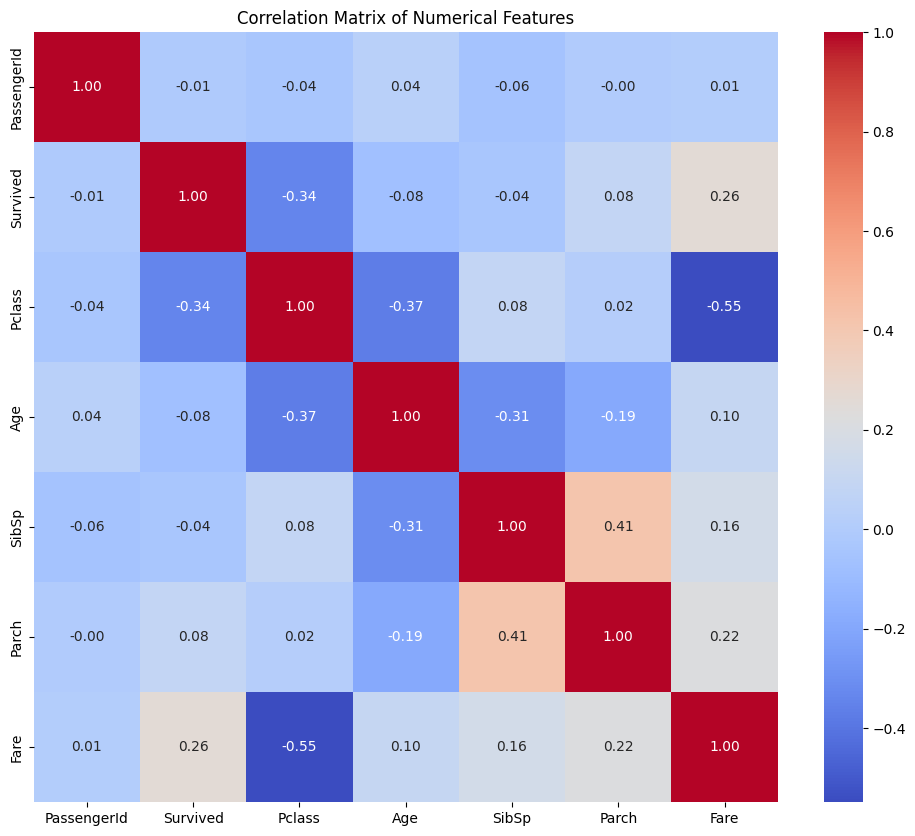

In [ ]:


import seaborn as sns


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
#performing hyperparameter tuning for random forest:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
best_model = grid_search.best_estimator_  # or random_search.best_estimator_ if using RandomizedSearchCV
y_pred = best_model.predict(X_test)

# Import metrics and evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.7686567164179104
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       156
           1       0.80      0.59      0.68       112

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.77      0.77      0.76       268

